In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#install kaggle
!pip install kaggle

In [ ]:
#upload kaggle file
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"akhila0307","key":"938cf4b12aa91cd7af58f985d9300c91"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
100% 1.98G/1.98G [00:24<00:00, 154MB/s]
100% 1.98G/1.98G [00:24<00:00, 86.4MB/s]


In [ ]:
!unzip fruit-and-vegetable-image-recognition.zip


Archive:  fruit-and-vegetable-image-recognition.zip
  inflating: test/apple/Image_1.jpg  
  inflating: test/apple/Image_10.jpg  
  inflating: test/apple/Image_2.jpg  
  inflating: test/apple/Image_3.jpg  
  inflating: test/apple/Image_4.jpg  
  inflating: test/apple/Image_5.jpg  
  inflating: test/apple/Image_6.JPG  
  inflating: test/apple/Image_7.jpg  
  inflating: test/apple/Image_8.jpg  
  inflating: test/apple/Image_9.jpg  
  inflating: test/banana/Image_1.jpg  
  inflating: test/banana/Image_10.jpg  
  inflating: test/banana/Image_2.jpg  
  inflating: test/banana/Image_3.jpg  
  inflating: test/banana/Image_4.jpg  
  inflating: test/banana/Image_5.jpg  
  inflating: test/banana/Image_6.jpg  
  inflating: test/banana/Image_8.jpg  
  inflating: test/banana/Image_9.jpg  
  inflating: test/beetroot/Image_1.jpg  
  inflating: test/beetroot/Image_10.jpg  
  inflating: test/beetroot/Image_2.jpg  
  inflating: test/beetroot/Image_3.jpg  
  inflating: test/beetroot/Image_4.jpg  
  inflati

In [ ]:
# Import TensorFlow
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
import pathlib
from pathlib import Path
import os.path


In [ ]:

train_path=pathlib.Path('/content/train') #path of train folder
test_path=pathlib.Path('/content/test') #path of test folder
validation_path=pathlib.Path('/content/validation') # path of validation folder

loading train,test and validation directories

In [ ]:
test_dir = Path('/content/test')
train_dir = Path('/content/train')
validation_dir = Path('/content/validation')

In [ ]:
# Get all .jpg files from the directory and its subdirectories
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

In [ ]:
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [ ]:
validation_filepaths = list(validation_dir.glob(r'**/*.jpg'))

convert directory to pandas dataframes


In [ ]:
def dir_to_df(data_dir):
    image_paths = []
    labels = []

    for class_label in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_label)

        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            image_paths.append(img_path)
            labels.append(class_label)

    return pd.DataFrame({'image': image_paths, 'label': labels})

In [ ]:

train_df = dir_to_df(train_dir)
val_df = dir_to_df(validation_dir)
test_df = dir_to_df(test_dir)

In [ ]:
class_names = train_df['label'].unique()

In [ ]:
class_names

array(['peas', 'apple', 'watermelon', 'jalepeno', 'onion', 'pomegranate',
       'paprika', 'soy beans', 'chilli pepper', 'capsicum', 'tomato',
       'orange', 'mango', 'cucumber', 'grapes', 'lettuce', 'sweetpotato',
       'pineapple', 'garlic', 'carrot', 'pear', 'ginger', 'cabbage',
       'beetroot', 'turnip', 'lemon', 'corn', 'raddish', 'potato',
       'spinach', 'bell pepper', 'cauliflower', 'banana', 'eggplant',
       'kiwi', 'sweetcorn'], dtype=object)

In [61]:
#Import load_img and img_to_array
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [62]:
# Function to load and preprocess images
def preprocess_img(image_path):
    """Loads an image, resizes it to 32x32, and converts it to an array."""
    img = load_img(image_path, target_size=(32, 32))  # Load and resize image
    img_array = img_to_array(img)                    # Convert to numerical array
    return img_array / 255.0                        # Normalize pixel values

In [63]:
# Preprocess images in your DataFrames
train_df['img_data'] = train_df['image'].apply(preprocess_img)
test_df['img_data'] = test_df['image'].apply(preprocess_img)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [81]:
# Get the number of classes
num_classes = len(class_names)

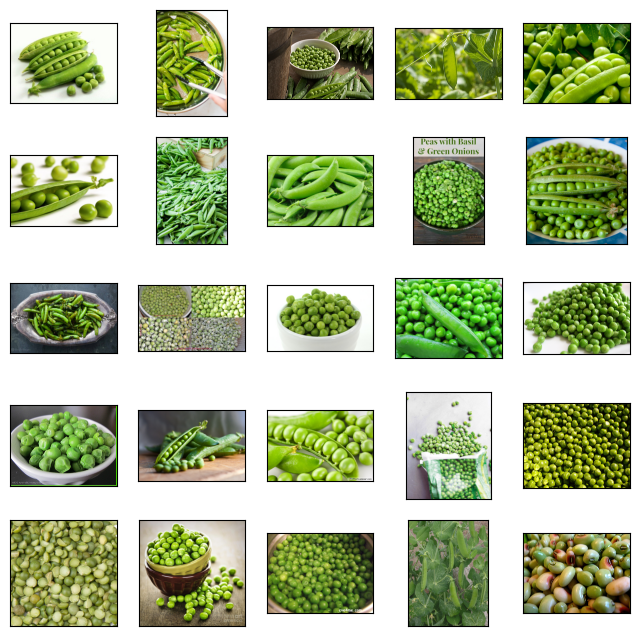

In [64]:
plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Access the image data using .iloc
    image_path = train_df.iloc[i]['image']  # Get the image path from the 'image' column
    image = plt.imread(image_path)       # Read the image using plt.imread
    plt.imshow(image)                    # Display the image using plt.imshow

In [65]:
train_df.head()

,image,label,img_data
0,/content/train/peas/Image_60.jpg,peas,"[[[0.9882353, 0.99607843, 0.9764706], [0.98823..."
1,/content/train/peas/Image_67.jpg,peas,"[[[0.54901963, 0.42352942, 0.3647059], [0.6509..."
2,/content/train/peas/Image_2.jpg,peas,"[[[0.34117648, 0.4, 0.23921569], [0.7372549, 0..."
3,/content/train/peas/Image_85.jpg,peas,"[[[0.5176471, 0.49803922, 0.28235295], [0.7098..."
4,/content/train/peas/Image_93.jpg,peas,"[[[0.49803922, 0.6392157, 0.011764706], [0.619..."


In [66]:
from sklearn.preprocessing import LabelEncoder
# Extract labels from train_df and convert to numerical format
train_labels = train_df['label'].values
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)


In [77]:
# Extract labels from test_df and convert to numerical format
test_labels = test_df['label'].values
label_encoder = LabelEncoder()
test_labels_encoded = label_encoder.fit_transform(test_labels)

In [67]:
#Build the CNN

#  Architecture 1: (conv) + (conv + pooling) + conv + (conv+pooling) = 6 layers
#  Architecture 2: (conv + pooling) + (conv+ pooling) + conv  = 5 layers


# this is code for Architecture 2
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [68]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.add(layers.Dense(num_classes))

In [83]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 36)                  │             396 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 369,462 (1.41 MB)

 Trainable params: 124,320 (485.62 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 245,142 (957.59 KB)

In [84]:
# Compile the model before training
model.compile(optimizer='adam', # Optimizer
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # Loss function
              metrics=['accuracy']) # Metrics

In [85]:
# Extract the preprocessed image data from the 'img_data' column
train_images = np.array(train_df['img_data'].tolist())
test_images = np.array(test_df['img_data'].tolist())

In [86]:
# Extract the preprocessed image data from the 'img_data' column and convert to a NumPy array
train_images = np.stack(train_df['img_data'].to_numpy()) # Use np.stack to create a single array
test_images = np.stack(test_df['img_data'].to_numpy())  # Use np.stack to create a single array

# Train the model
history = model.fit(train_images, train_labels_encoded, epochs=10,
                    validation_data=(test_images, test_labels_encoded))

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.0356 - loss: 3.5694 - val_accuracy: 0.0557 - val_loss: 3.2731
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.0562 - loss: 3.2979 - val_accuracy: 0.0919 - val_loss: 3.0564
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.0827 - loss: 3.1344 - val_accuracy: 0.1281 - val_loss: 2.8346
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.1216 - loss: 2.9703 - val_accuracy: 0.1643 - val_loss: 2.6797
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - accuracy: 0.1543 - loss: 2.8249 - val_accuracy: 0.2033 - val_loss: 2.4942
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.1731 - loss: 2.6966 - val_accuracy: 0.2201 - val_loss: 2.3596
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.2151 - loss: 2.5571 - val_accuracy: 0.2869 - val_loss: 2.2269
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - accuracy: 0.2376 - loss: 2.4393 - val_accuracy: 0.3482 - 

evaluate the model


12/12 - 0s - 12ms/step - accuracy: 0.3928 - loss: 1.8041


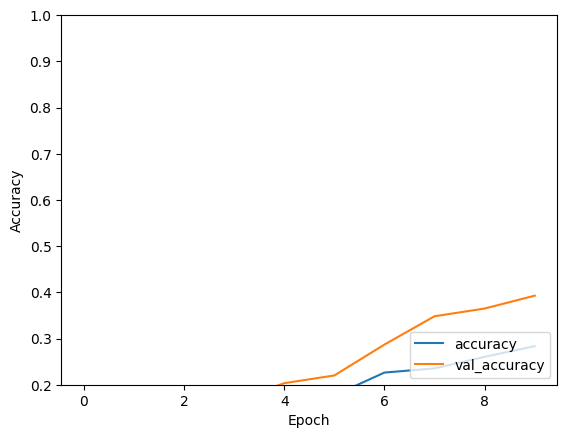

In [92]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')

# Use the encoded test labels (test_labels_encoded) instead of the original string labels (test_labels)
test_loss, test_acc = model.evaluate(test_images,
                                     test_labels_encoded, # Changed to test_labels_encoded
                                     verbose=2)

In [93]:
print('Test Accuracy is',test_acc)

Test Accuracy is 0.3927576541900635
